In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nz_vae.lae as lae
import fit_model_lae
import pickle
import tensorflow as tf


In [15]:
input_data, output_data, (mean_input, std_input), (mean_output, std_output) = fit_model_lae.generate_data()

Loading data from data/nz_realization_array.npy and data/dirichlet_theory_vectors.npy


KeyboardInterrupt: 

In [35]:
input_data = input_data[:200]
output_data = output_data[:200]


In [36]:
nepoch = 1000
batch_size=200
nreal = input_data.shape[0]
nbin = input_data.shape[1]
nz = input_data.shape[2]
ndata = output_data.shape[1]
latent_dim = 16

In [37]:
encoder, decoder = lae.make_conv_model(nbin, nz, ndata, latent_dim, verbose=True)
model = lae.LAE(encoder=encoder, decoder=decoder, latent_dim=latent_dim)
model.compile(optimizer=tf.keras.optimizers.legacy.Adam())
model.built = True
model.load_weights(f"lae_weights_dim{latent_dim}_eps{nepoch}_bat{batch_size}_real{nreal}.hdf5")


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 4, 299)]     0           []                               
                                                                                                  
 reshape_6 (Reshape)            (None, 4, 299, 1)    0           ['input_15[0][0]']               
                                                                                                  
 conv2d_12 (Conv2D)             (None, 4, 280, 64)   1344        ['reshape_6[0][0]']              
                                                                                                  
 conv2d_13 (Conv2D)             (None, 4, 261, 32)   40992       ['conv2d_12[0][0]']              
                                                                                            

In [55]:
n = 100
z_sample = np.random.normal(size=(n, latent_dim))
dv_generated_normalized = model.decoder.predict(z_sample)
dv_generated = dv_generated_normalized * std_output + mean_output

4/4 [==============================] - 0s 2ms/step


In [50]:
dv_input = output_data * std_output + mean_output

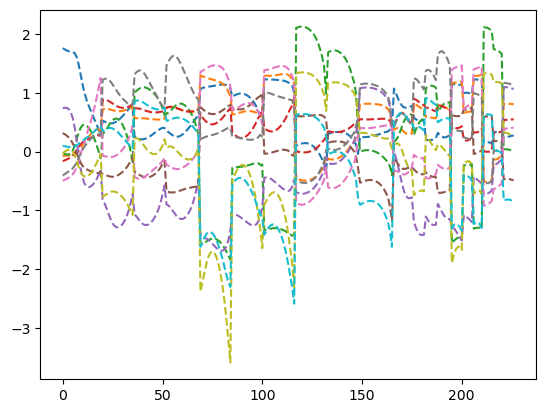

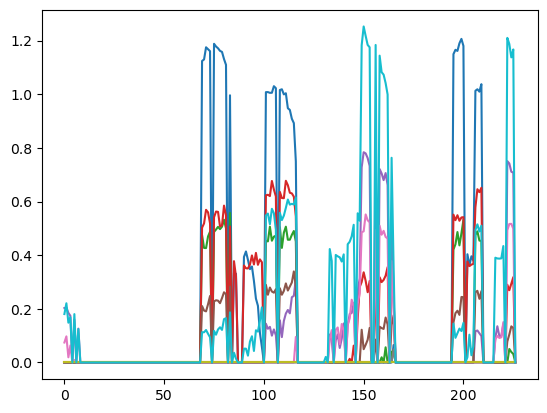

In [58]:
for i in range(10):
    plt.plot(output_data[i], '--')

plt.figure()
for i in range(10):
    plt.plot(dv_generated_normalized[i])
